In [1]:

import numpy as np
import pyutils.fig as fg
import STmodel.data.cases as stc
import STmodel.model.st as stm


In [2]:

case = stc.case.CaseSet('Lu_2021')

lr = 1.0


In [3]:

nx = 50

ur_list = np.linspace(0, 25, num=nx)

sr = np.zeros(nx)


In [4]:

unburnt = 'T-300_p-10_phi-0.6'
d = case.get_case_data(unburnt)
r = case.get_reactant(unburnt)
m = stm.Model(r)

for i, ur in enumerate(ur_list):
    # calculate model predicitons
    sr[i] = m.ratio_turbulent_burning_velocity(ur, lr)


In [5]:

config = fg.PlotConfig('manuscript_single')


Text(0, 0.5, '$s_T/s_L^0$')

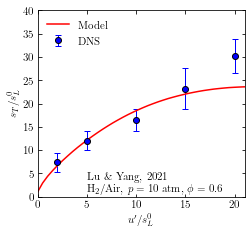

In [6]:

fig, ax = config.get_simple()

ax.errorbar(d.turbulence_intensity,
            d.turbulent_burning_velocity,
            yerr=d.turbulent_burning_velocity_std,
            fmt='o', c='b', mec='k', ms=6, mew=1,
            capsize=3, capthick=1.5, elinewidth=1,
            label='DNS')

ax.plot(ur_list, sr, '-', c='r',label='Model')

ax.set_xlim(0, 21)
ax.set_ylim(0, 40)

ax.set_xticks(np.linspace(0, 20, num=5))
ax.set_yticks(np.linspace(0, 40, num=9))

ax.legend(frameon=False)

ax.text(5, 1,
        'Lu \& Yang, 2021\n'
        +r'H$_2$/Air, $p=10\;\mathrm{atm}$, $\phi=0.6$')

ax.tick_params(which='major', direction='in', bottom=True, top=True, left=True, right=True)

ax.set_xlabel(r'$u^\prime/s_L^0$')
ax.set_ylabel(r'$s_T/s_L^0$')
